load checkpoint from http path: https://download.openmmlab.com/mmpose/face/hrnetv2/hrnetv2_w18_aflw_256x256-f2bbc62b_20210125.pth


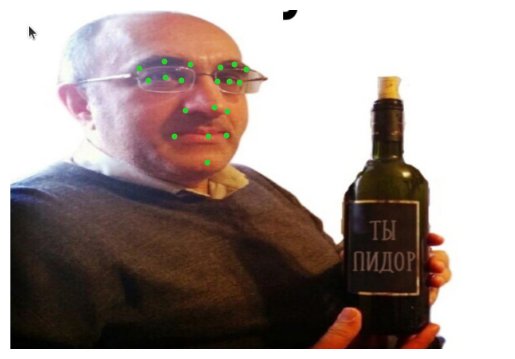

In [100]:
import image_getter
img = input()
dict = image_getter.ImageGetter(img)
dict.show()

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

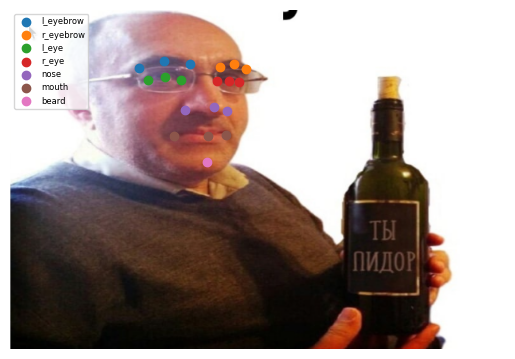

In [102]:
data = dict.get()
image = data['image']
keypoints = data['keypoints']
keypoints_x = keypoints[:, 0]
keypoints_y = keypoints[:, 1]
marker_id = ['l_eyebrow', 'r_eyebrow', 'l_eye', 
             'r_eye', 'nose', 'mouth', 'beard']
marker_split = np.array([0, 3, 6, 9, 12, 15, 18, 19])
marker_dict = { marker_id[i]: (marker_split[i], marker_split[i+1]) 
                            for i in range(len(marker_split)-1) }
#print(marker_dict)
label_dict = {}
plt.axis('off')
plt.imshow(image)
for label, (start, end) in marker_dict.items():
    it_x = keypoints_x[start:end]
    it_y = keypoints_y[start:end]
    plt.scatter(it_x, it_y, label=label)
    label_dict[label] = (it_x, it_y)
plt.legend(loc=2, prop={'size': 6})

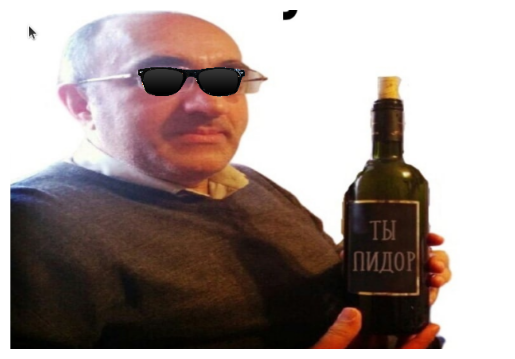

In [103]:
image_copy = np.copy(image)
x_top_left = int(label_dict['l_eyebrow'][0][0])
y_top_left = int(label_dict['l_eyebrow'][1][0])
high = int(abs(label_dict['l_eye'][1][2] - label_dict['nose'][1][0]))
width = int(abs(label_dict['r_eyebrow'][0][2] - label_dict['l_eyebrow'][0][0]))
filter = cv2.imread('./filters/sunglasses.png', cv2.IMREAD_UNCHANGED)
filter = cv2.resize(filter, (width, high), interpolation = cv2.INTER_CUBIC)
roi = image_copy[y_top_left:y_top_left+high, x_top_left:x_top_left+width]
filter_it = np.argwhere(filter[:,:,3] > 0)
for i in range(3):
    roi[filter_it[:,0], filter_it[:,1], i] = filter[filter_it[:,0], filter_it[:,1], i]
image_copy[y_top_left:y_top_left+high, x_top_left:x_top_left+width] = roi
plt.axis('off')
plt.imshow(image_copy)
#plt.imshow(filter)
#plt.scatter(label_dict['nose'][0][0], label_dict['nose'][1][0])